In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import numpy as np

In [2]:
with open('Produccion_Agricola_Region_Cusco_2018-2020.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('Produccion_Agricola_Region_Cusco_2018-2020.csv',delimiter=';', encoding=result['encoding'])

In [3]:
df.head(3)

,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,PERIODO_AGRICOLA,CULTIVO,SUPERFICIE_VERDE,SIEMBRA,COSECHA,RENDIMIENTO,PRODUCCION,PRECIO_CHACRA,SUPERFICIE_PERDIDA,VALOR_PRODUCCION,FECHA_CORTE
0,CUSCO,ANTA,ANCAHUASI,80302,2020,ALFALFA,190.470588,147.0,147.0,81972.789,12050.0,0.19,NaN,2289.50,20230810
1,CUSCO,ANTA,ANCAHUASI,80302,2020,ARVEJA GRANO SECO,20.700000,23.0,23.0,2000.000,46.0,2.50,NaN,115.00,20230810
2,CUSCO,ANTA,ANCAHUASI,80302,2020,ARVEJA GRANO VERDE,29.636364,40.0,31.0,6000.000,186.0,1.79,NaN,332.94,20230810


In [ ]:
df.hist(figsize=(20,15));

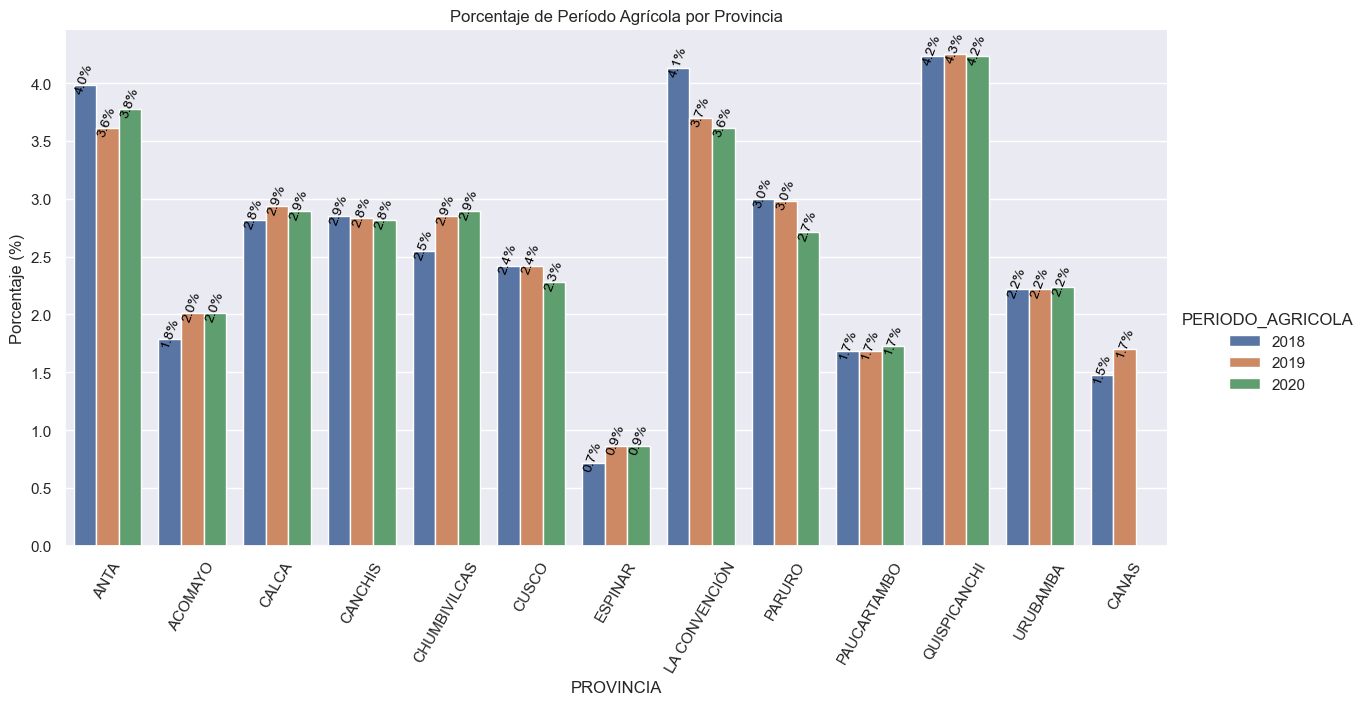

In [62]:
# Calcular los porcentajes por período agrícola y provincia
df['Porcentaje'] = (df.groupby(['PERIODO_AGRICOLA', 'PROVINCIA'])['PROVINCIA'].transform('count') / len(df)) * 100

# Crear el gráfico de barras
fig = sns.catplot(data=df, x='PROVINCIA', y='Porcentaje', hue='PERIODO_AGRICOLA', kind='bar', height=6, aspect=2)

# Agregar etiquetas con números a las barras
for ax in fig.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, rotation=70, color='black', xytext=(0, 5), textcoords='offset points')

fig.set_xticklabels(rotation=60)
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de Período Agrícola por Provincia')
plt.show()





In [37]:
#Calculando estadisticas
descripcion_periodo_agricola = df['PERIODO_AGRICOLA'].describe()
print(descripcion_periodo_agricola)

count    4869.000000
mean     2018.981926
std         0.811838
min      2018.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2020.000000
Name: PERIODO_AGRICOLA, dtype: float64


In [38]:
df.describe(include=['float64'])

,SUPERFICIE_VERDE,SIEMBRA,COSECHA,RENDIMIENTO,PRODUCCION,PRECIO_CHACRA,SUPERFICIE_PERDIDA,VALOR_PRODUCCION
count,4855.000000,3975.000000,4558.000000,4.555000e+03,4698.000000,4698.000000,93.000000,4869.000000
mean,133.026335,105.430787,150.043965,1.058657e+04,857.907698,1.937381,140.214946,987.776446
std,890.666787,233.529837,897.413656,5.286601e+04,2896.843424,1.793352,374.619033,3490.198487
min,0.000000,0.500000,0.500000,0.000000e+00,1.000000,0.100000,0.250000,0.000000
25%,9.462567,12.000000,12.000000,1.646552e+03,44.000000,1.000000,5.000000,66.000000
50%,23.571429,29.000000,29.000000,5.000000e+03,147.500000,1.500000,12.000000,201.960000
75%,82.435897,100.000000,102.000000,1.200000e+04,574.750000,2.500000,40.000000,621.796000
max,28680.176471,3835.000000,28536.000000,3.360000e+06,76700.000000,82.800000,2435.000000,99360.000000


In [39]:
df.describe(include=['object'])

,DEPARTAMENTO,PROVINCIA,DISTRITO,CULTIVO
count,4869,4869,4869,4869
unique,1,13,106,73
top,CUSCO,QUISPICANCHI,LIMATAMBO,PAPA (agrupa mejoradas y nativas)
freq,4869,619,86,277


In [4]:
#Analisis a nivel Velille
velille_data = df[df['DISTRITO'] == 'VELILLE']

In [ ]:
print(velille_data.describe())

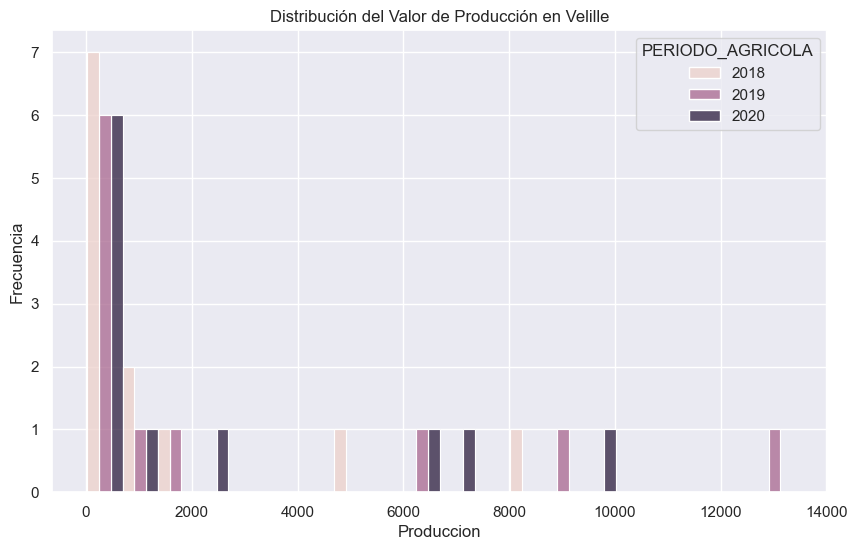

In [63]:
#Analizando Valor de produccion y la frecuencia de estos
plt.figure(figsize=(10, 6))
sns.histplot(data=velille_data, x='PRODUCCION', bins=20,hue='PERIODO_AGRICOLA', multiple='dodge')
sns.set(style='darkgrid', palette='deep')
plt.title('Distribución del Valor de Producción en Velille')
plt.xlabel('Produccion')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

C:\Users\rogue\AppData\Local\Temp\ipykernel_15024\4180876108.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=velille_data, x='SIEMBRA', hue='CULTIVO')
C:\Users\rogue\AppData\Local\Temp\ipykernel_15024\4180876108.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=velille_data, x='SIEMBRA', hue='CULTIVO')


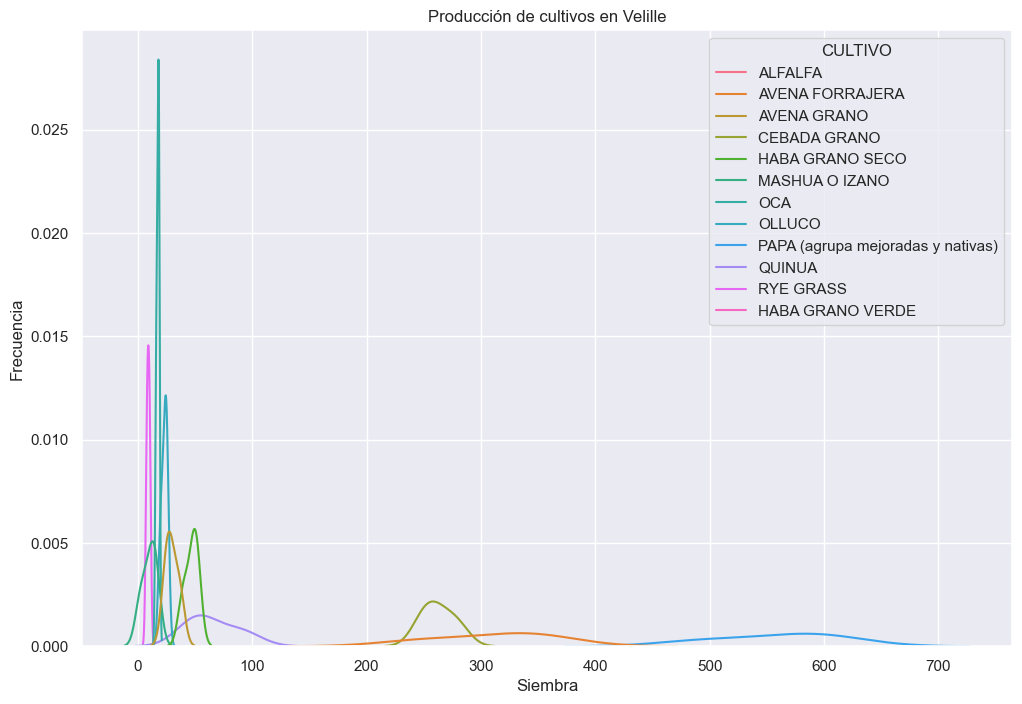

In [6]:
#Cultivos mas sembrados en Velille
plt.figure(figsize=(12, 8))
sns.kdeplot(data=velille_data, x='SIEMBRA', hue='CULTIVO')
sns.set(palette='deep')
plt.title('Producción de cultivos en Velille')
plt.xlabel('Siembra')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

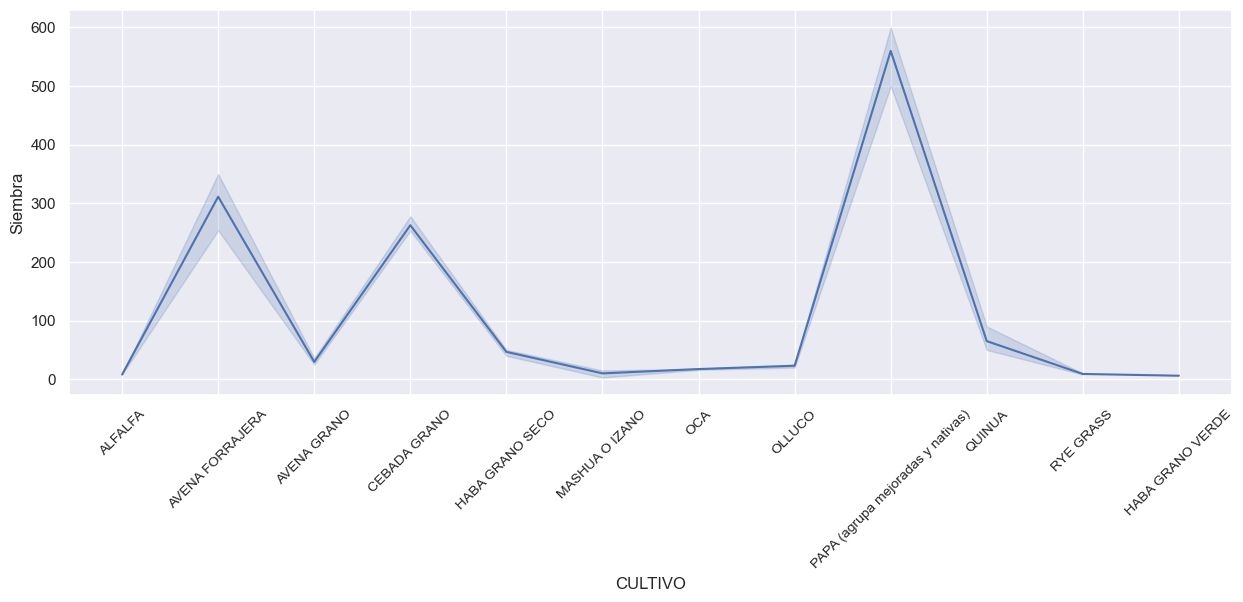

In [55]:
fig = plt.figure(figsize=(15,5),dpi=100)
plt.xticks(rotation=45,fontsize=10);
sns.lineplot(data=velille_data, x= 'CULTIVO', y = 'SIEMBRA')
plt.ylabel('Siembra')
plt.show()

In [43]:
#Analisis de tendencia central, posicion y dispersion
mean = velille_data['PRECIO_CHACRA'].mean()
median = velille_data['PRECIO_CHACRA'].median()
mode = velille_data['PRECIO_CHACRA'].mode()
skew = velille_data['PRECIO_CHACRA'].skew()
kurt = velille_data['PRECIO_CHACRA'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 1.3539117647058823
La mediana es: 1.279
La moda es: 0    1.2
Name: PRECIO_CHACRA, dtype: float64
El sesgo es: 1.2754661223384036
La kurtosis es: 2.0096747046971637


In [7]:
#Analisis a nivel Chumbivilcas
chumbivilcas_data = df[df['PROVINCIA'] == 'CHUMBIVILCAS']

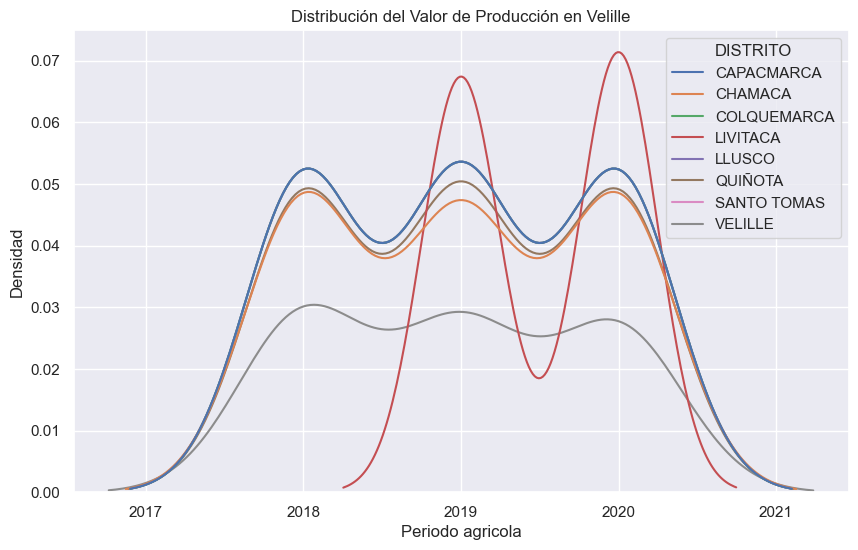

In [45]:
#Cómo se distribuyen los períodos agrícolas en diferentes distritos
plt.figure(figsize=(10, 6))
sns.kdeplot(data=chumbivilcas_data, x='PERIODO_AGRICOLA', hue='DISTRITO', cumulative=False)
plt.title('Distribución del Valor de Producción en Velille')
plt.xlabel('Periodo agricola')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

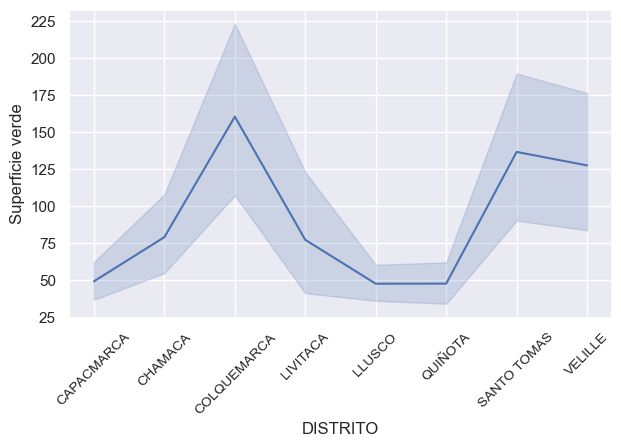

In [50]:
fig = plt.figure(figsize=(7,4),dpi=100)
plt.xticks(rotation=45,fontsize=10);
sns.lineplot(data=chumbivilcas_data, x= 'DISTRITO', y = 'SUPERFICIE_VERDE')
plt.ylabel('Superficie verde')
plt.show()

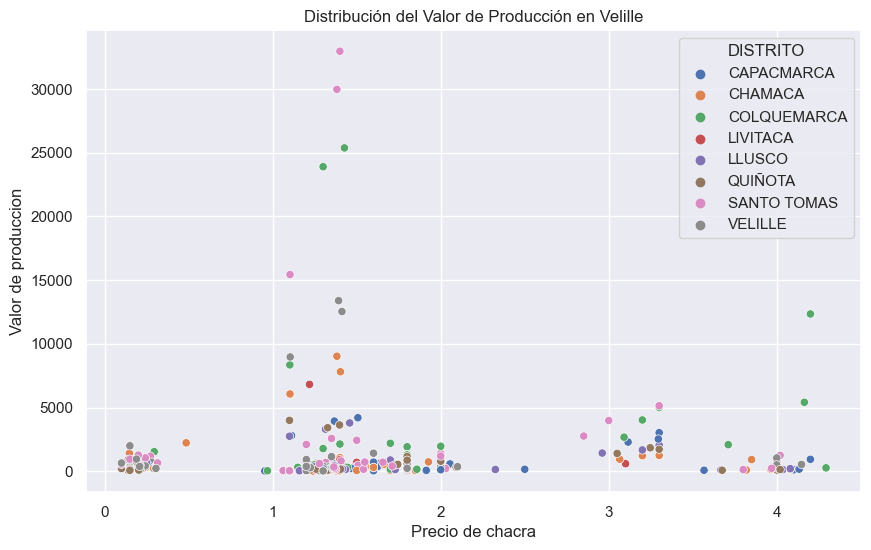

In [40]:

#Relaciona el valor de producción con los precios de chacra para entender cómo los precios influyen en los ingresos generados por la producción agrícola
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chumbivilcas_data, x='PRECIO_CHACRA', y='VALOR_PRODUCCION', hue='DISTRITO', marker='o')
plt.title('Distribución del Valor de Producción en Velille')
plt.xlabel('Precio de chacra')
plt.ylabel('Valor de produccion')
plt.grid(True)
plt.show()

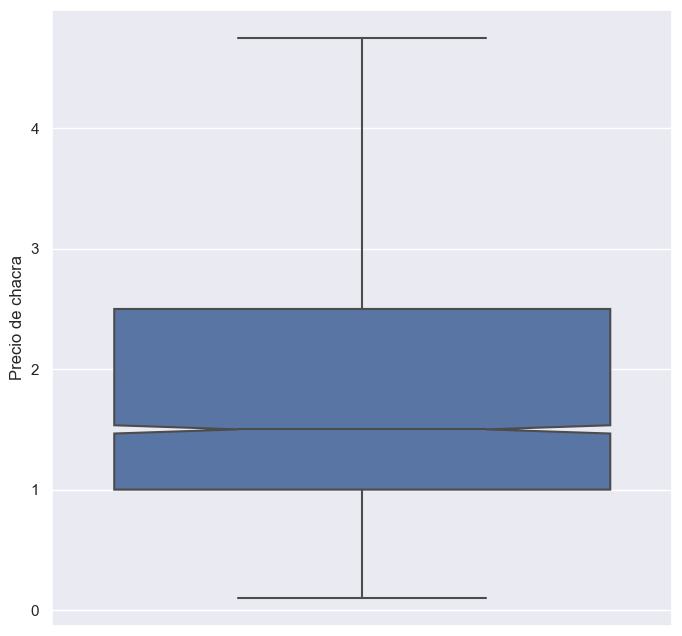

In [24]:
fig = plt.figure(figsize=(8,8))
sns.boxplot(y=df["PRECIO_CHACRA"], showfliers=False, notch=True)
plt.ylabel('Precio de chacra')
plt.show()

In [42]:
#Analisis de tendencia central, posicion y dispersion
mean = chumbivilcas_data['PRECIO_CHACRA'].mean()
median = chumbivilcas_data['PRECIO_CHACRA'].median()
mode = chumbivilcas_data['PRECIO_CHACRA'].mode()
skew = chumbivilcas_data['PRECIO_CHACRA'].skew()
kurt = chumbivilcas_data['PRECIO_CHACRA'].kurt()
print("La media es:", mean)
print("La mediana es:", median)
print("La moda es:", mode)
print("El sesgo es:", skew)
print("La kurtosis es:", kurt)

La media es: 1.6075283505154638
La mediana es: 1.3944999999999999
La moda es: 0    1.8
Name: PRECIO_CHACRA, dtype: float64
El sesgo es: 0.9299022731089779
La kurtosis es: 0.4887237549598846
